# *Olympic Medals 1896-2024*

Joseph Lardie

August 2024

# *Imports*

In [1]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

# Geographical data conversion
import pycountry_convert as pc

# Statistical analysis
import scipy.stats as stats
from scipy.stats import f_oneway

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# *Loading Data*

In [2]:
# Loading Medal Data for 2024
Medals = pd.read_csv('medals_total.csv')

In [3]:
# Loading Medal Data for 1896-2020
smd =  pd.read_csv('Summer_olympic_Medals.csv')

# *Data Exploration*

In [4]:
# Preview of Medals Data for 2024
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   country_long  92 non-null     object
 3   Gold Medal    92 non-null     int64 
 4   Silver Medal  92 non-null     int64 
 5   Bronze Medal  92 non-null     int64 
 6   Total         92 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.2+ KB


In [5]:
# Inspecting Medals from 2024
Medals.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64


In [6]:
# Preview of Medals Data for 1896-2020
smd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1344 non-null   int64 
 1   Host_country  1344 non-null   object
 2   Host_city     1344 non-null   object
 3   Country_Name  1344 non-null   object
 4   Country_Code  1258 non-null   object
 5   Gold          1344 non-null   int64 
 6   Silver        1344 non-null   int64 
 7   Bronze        1344 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 84.1+ KB


In [7]:
# Inspecting data from 1896-2020
smd.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2


# *Data Cleaning*

In [8]:
#Dropping unnecessary collumns
columns_to_drop = ["country_long"]
Medals = Medals.drop(columns_to_drop, axis = 1)
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   Gold Medal    92 non-null     int64 
 3   Silver Medal  92 non-null     int64 
 4   Bronze Medal  92 non-null     int64 
 5   Total         92 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.4+ KB


In [9]:
# Adding in columns missing from 2024 medal totals data Taht are already in the other data set
Medals['Year'] = 2024
Medals['Host_country'] = "France"
Medals['Host_city'] = "Paris" 

In [10]:
# Confiming new columns were added
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   Gold Medal    92 non-null     int64 
 3   Silver Medal  92 non-null     int64 
 4   Bronze Medal  92 non-null     int64 
 5   Total         92 non-null     int64 
 6   Year          92 non-null     int64 
 7   Host_country  92 non-null     object
 8   Host_city     92 non-null     object
dtypes: int64(5), object(4)
memory usage: 6.6+ KB


In [11]:
# Check for missing values
print("There are", Medals.isna().sum().sum(), "missing values total.")

There are 0 missing values total.


In [12]:
# Confiming data was added to the dataframe
Medals.head()

,country_code,country,Gold Medal,Silver Medal,Bronze Medal,Total,Year,Host_country,Host_city
0,USA,United States,40,44,42,126,2024,France,Paris
1,CHN,China,40,27,24,91,2024,France,Paris
2,JPN,Japan,20,12,13,45,2024,France,Paris
3,AUS,Australia,18,19,16,53,2024,France,Paris
4,FRA,France,16,26,22,64,2024,France,Paris


In [13]:
# Renaming columns to match the other data set
Medals.rename(columns={
    'country_code': 'Country_Code',
    'country': 'Country_Name',
    'Gold Medal': 'Gold',
    'Silver Medal': 'Silver',
    'Bronze Medal': 'Bronze',
    'Total': 'Total_Medals'
}, inplace=True)

In [14]:
# Confirming column names were changed
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_Code  92 non-null     object
 1   Country_Name  92 non-null     object
 2   Gold          92 non-null     int64 
 3   Silver        92 non-null     int64 
 4   Bronze        92 non-null     int64 
 5   Total_Medals  92 non-null     int64 
 6   Year          92 non-null     int64 
 7   Host_country  92 non-null     object
 8   Host_city     92 non-null     object
dtypes: int64(5), object(4)
memory usage: 6.6+ KB


In [15]:
# Confirming column names are matching other dataset
smd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1344 non-null   int64 
 1   Host_country  1344 non-null   object
 2   Host_city     1344 non-null   object
 3   Country_Name  1344 non-null   object
 4   Country_Code  1258 non-null   object
 5   Gold          1344 non-null   int64 
 6   Silver        1344 non-null   int64 
 7   Bronze        1344 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 84.1+ KB


In [16]:
# Adding a Total_Medals column to the smd data
smd['Total_Medals'] = smd['Gold'] + smd['Silver'] + smd['Bronze']

In [17]:
# Confiming column was added
smd.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals
0,1896,Greece,Athens,Great Britain,GBR,2,3,2,7
1,1896,Greece,Athens,Hungary,HUN,2,1,3,6
2,1896,Greece,Athens,France,FRA,5,4,2,11
3,1896,Greece,Athens,United States,USA,11,7,2,20
4,1896,Greece,Athens,Germany,GER,6,5,2,13


# *Merging Data Frames Together*

In [18]:
# concatenating the two datasets together
df = pd.concat([smd, Medals], ignore_index=True)

In [19]:
# Checking that the dataframes merged properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1436 non-null   int64 
 1   Host_country  1436 non-null   object
 2   Host_city     1436 non-null   object
 3   Country_Name  1436 non-null   object
 4   Country_Code  1350 non-null   object
 5   Gold          1436 non-null   int64 
 6   Silver        1436 non-null   int64 
 7   Bronze        1436 non-null   int64 
 8   Total_Medals  1436 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 101.1+ KB


In [20]:
# Check for missing values
print("There are", df.isna().sum().sum(), "missing values total.")

There are 86 missing values total.


In [21]:
#Looking at location missing values
df.isna().sum()

Year             0
Host_country     0
Host_city        0
Country_Name     0
Country_Code    86
Gold             0
Silver           0
Bronze           0
Total_Medals     0
dtype: int64

## *Function to replace missing values*

In [22]:
# Create a mapping from Country_Name to Country_Code using rows with non-missing Country_Code
country_code_map = df.dropna(subset=['Country_Code'])[['Country_Name', 'Country_Code']].drop_duplicates()
country_code_map = country_code_map.set_index('Country_Name')['Country_Code'].to_dict()

# Function to fill missing Country_Code using the Country_Name
def fill_country_code(row):
    if pd.isna(row['Country_Code']):
        return country_code_map.get(row['Country_Name'], None)
    return row['Country_Code']

# Apply the function to fill missing Country_Code values
df['Country_Code'] = df.apply(fill_country_code, axis=1)

# Check if there are any remaining missing values
missing_codes = df[df['Country_Code'].isna()]
print(missing_codes)

      Year Host_country       Host_city                  Country_Name  \
1233  2016       Brazil  Rio de Janeiro  Independent Olympic Athletes   

     Country_Code  Gold  Silver  Bronze  Total_Medals  
1233         None     1       0       1             2  


## *Creating a function to fill in missing abbreviation*

In [23]:
# Create a mapping from Country_Name to Country_Code using rows with non-missing Country_Code and adding 'IOA' for Idependent Olympic Athletes.
def fill_country_code(row):
    if pd.isna(row['Country_Code']):
        if row['Country_Name'].lower() == 'independent olympic athletes':
            return 'IOA'  # Or some other code/leave it as None
        return country_code_map.get(row['Country_Name'].lower(), None)
    return row['Country_Code']
df['Country_Code'] = df.apply(fill_country_code, axis=1)
# Check if there are any remaining missing values
missing_codes = df[df['Country_Code'].isna()]
print(missing_codes)

Empty DataFrame
Columns: [Year, Host_country, Host_city, Country_Name, Country_Code, Gold, Silver, Bronze, Total_Medals]
Index: []


In [24]:
#Looking at missing values for each column
df.isna().sum()

Year            0
Host_country    0
Host_city       0
Country_Name    0
Country_Code    0
Gold            0
Silver          0
Bronze          0
Total_Medals    0
dtype: int64

In [25]:
# Inpsecting data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1436 non-null   int64 
 1   Host_country  1436 non-null   object
 2   Host_city     1436 non-null   object
 3   Country_Name  1436 non-null   object
 4   Country_Code  1436 non-null   object
 5   Gold          1436 non-null   int64 
 6   Silver        1436 non-null   int64 
 7   Bronze        1436 non-null   int64 
 8   Total_Medals  1436 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 101.1+ KB


In [26]:
# Checking data is merged properly and accurate
df.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals
0,1896,Greece,Athens,Great Britain,GBR,2,3,2,7
1,1896,Greece,Athens,Hungary,HUN,2,1,3,6
2,1896,Greece,Athens,France,FRA,5,4,2,11
3,1896,Greece,Athens,United States,USA,11,7,2,20
4,1896,Greece,Athens,Germany,GER,6,5,2,13


In [27]:
# Checking data is merged properly and accurate
print(df)

      Year Host_country Host_city   Country_Name Country_Code  Gold  Silver  \
0     1896       Greece    Athens  Great Britain          GBR     2       3   
1     1896       Greece    Athens        Hungary          HUN     2       1   
2     1896       Greece    Athens         France          FRA     5       4   
3     1896       Greece    Athens  United States          USA    11       7   
4     1896       Greece    Athens        Germany          GER     6       5   
...    ...          ...       ...            ...          ...   ...     ...   
1431  2024       France     Paris           Peru          PER     0       0   
1432  2024       France     Paris          Qatar          QAT     0       0   
1433  2024       France     Paris      Singapore          SGP     0       0   
1434  2024       France     Paris       Slovakia          SVK     0       0   
1435  2024       France     Paris         Zambia          ZAM     0       0   

      Bronze  Total_Medals  
0          2          

In [28]:
# Checking Unique values
unique_counts = df.nunique()
print(unique_counts)

Year             30
Host_country     21
Host_city        23
Country_Name    171
Country_Code    163
Gold             51
Silver           44
Bronze           43
Total_Medals     96
dtype: int64


# *Feature Engineering*

## *Medal Efficiency*

In [29]:
# Medal Efficiency: Total Medals / Number of Years
df['Medal_Efficiency'] = df['Total_Medals'] / (df['Year'] - df.groupby('Country_Name')['Year'].transform('min') + 1)

## *Host Advantage*

In [30]:
# Host Advantage: Binary feature indicating whether the country was the host in that year
df['Host_Advantage'] = df.apply(lambda x: 1 if x['Host_country'] == x['Country_Name'] else 0, axis=1)

## *Continent Aggregation*

In [31]:
# Function to map country codes to continent names.
def get_continent(Country_Code):
    try:
        # Ensure the country_code is a string and has exactly 3 characters
        if isinstance(Country_Code, str) and len(Country_Code) == 3:
            # Convert country code to alpha-2 format
            alpha_2 = pc.country_alpha3_to_country_alpha2(Country_Code)
            
            # Get the continent code (e.g., NA, SA, AS, OC, AF, EU)
            continent_code = pc.country_alpha2_to_continent_code(alpha_2)
            
            # Convert the continent code to the full name
            continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            
            return continent_name
        else:
            return None  # Return None if country_code is not valid
    except (KeyError, TypeError):
        return None  # Handle any errors in conversion

# Apply the function to your dataframe
df['continent'] = df['Country_Code'].apply(get_continent)

# Aggregate the total medals by continent
continent_medal_counts = df.groupby('continent')['Total_Medals'].sum().reset_index(name='Total_Medals')

# Sort by total medals for better visualization
#continent_medal_counts = continent_medal_counts.sort_values(by='Total_Medals', ascending=False)

# Merge the aggregated continent medal counts back to the original dataframe
df = df.merge(continent_medal_counts, on='continent', suffixes=('', '_per_continent'))

## *Historical Performance Trend*

In [32]:
# Sort the dataframe by Country_Name and Year to ensure the trend calculation is accurate
df = df.sort_values(by=['Country_Name', 'Year'])

# Calculate the percentage change in Total Medals from one Olympic Games to the next for each country
df['Medal_Trend'] = df.groupby('Country_Name')['Total_Medals'].pct_change() * 100

## *Most Common Medal for each Country For each Year*

In [33]:
# Function to determine the type of medal won the most
def most_common_medal(row):
    # Extract the number of medals
    gold = row['Gold']
    silver = row['Silver']
    bronze = row['Bronze']
    
    # Determine which medal type has the maximum count
    max_medal = max(gold, silver, bronze)
    
    if gold == max_medal:
        return 'Gold'
    elif silver == max_medal:
        return 'Silver'
    else:
        return 'Bronze'

# Apply the function to each row and create a new column 'Most_Common_Medal'
df['Most_Common_Medal'] = df.apply(most_common_medal, axis=1)

In [34]:
#Looking at missing values for each column
df.isna().sum()

Year                           0
Host_country                   0
Host_city                      0
Country_Name                   0
Country_Code                   0
Gold                           0
Silver                         0
Bronze                         0
Total_Medals                   0
Medal_Efficiency               0
Host_Advantage                 0
continent                      0
Total_Medals_per_continent     0
Medal_Trend                   99
Most_Common_Medal              0
dtype: int64

In [35]:
# Checking Unique values
unique_counts = df.nunique()
print(unique_counts)

Year                           30
Host_country                   21
Host_city                      23
Country_Name                   99
Country_Code                   91
Gold                           44
Silver                         41
Bronze                         40
Total_Medals                   86
Medal_Efficiency              485
Host_Advantage                  2
continent                       6
Total_Medals_per_continent      6
Medal_Trend                   271
Most_Common_Medal               3
dtype: int64


In [36]:
# Checking that the newly created columns were created correctly
df.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals,Medal_Efficiency,Host_Advantage,continent,Total_Medals_per_continent,Medal_Trend,Most_Common_Medal
714,2008,China,Beijing,Afghanistan,AFG,0,0,1,1,1.0,0,Asia,2191,NaN,Bronze
730,2012,Great Britain,London,Afghanistan,AFG,0,0,1,1,0.2,0,Asia,2191,0.000000,Bronze
407,2024,France,Paris,Albania,ALB,0,0,2,2,2.0,0,Europe,5993,NaN,Bronze
797,1924,France,Paris,Argentina,ARG,1,3,2,6,6.0,0,South America,325,NaN,Silver
798,1928,Netherlands,Amsterdam,Argentina,ARG,3,3,1,7,1.4,0,South America,325,16.666667,Gold


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 714 to 865
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        967 non-null    int64  
 1   Host_country                967 non-null    object 
 2   Host_city                   967 non-null    object 
 3   Country_Name                967 non-null    object 
 4   Country_Code                967 non-null    object 
 5   Gold                        967 non-null    int64  
 6   Silver                      967 non-null    int64  
 7   Bronze                      967 non-null    int64  
 8   Total_Medals                967 non-null    int64  
 9   Medal_Efficiency            967 non-null    float64
 10  Host_Advantage              967 non-null    int64  
 11  continent                   967 non-null    object 
 12  Total_Medals_per_continent  967 non-null    int64  
 13  Medal_Trend                 868 n

# *Visualizations*

## *Total Number of Medals Awarded Each Year (1896-2024)*

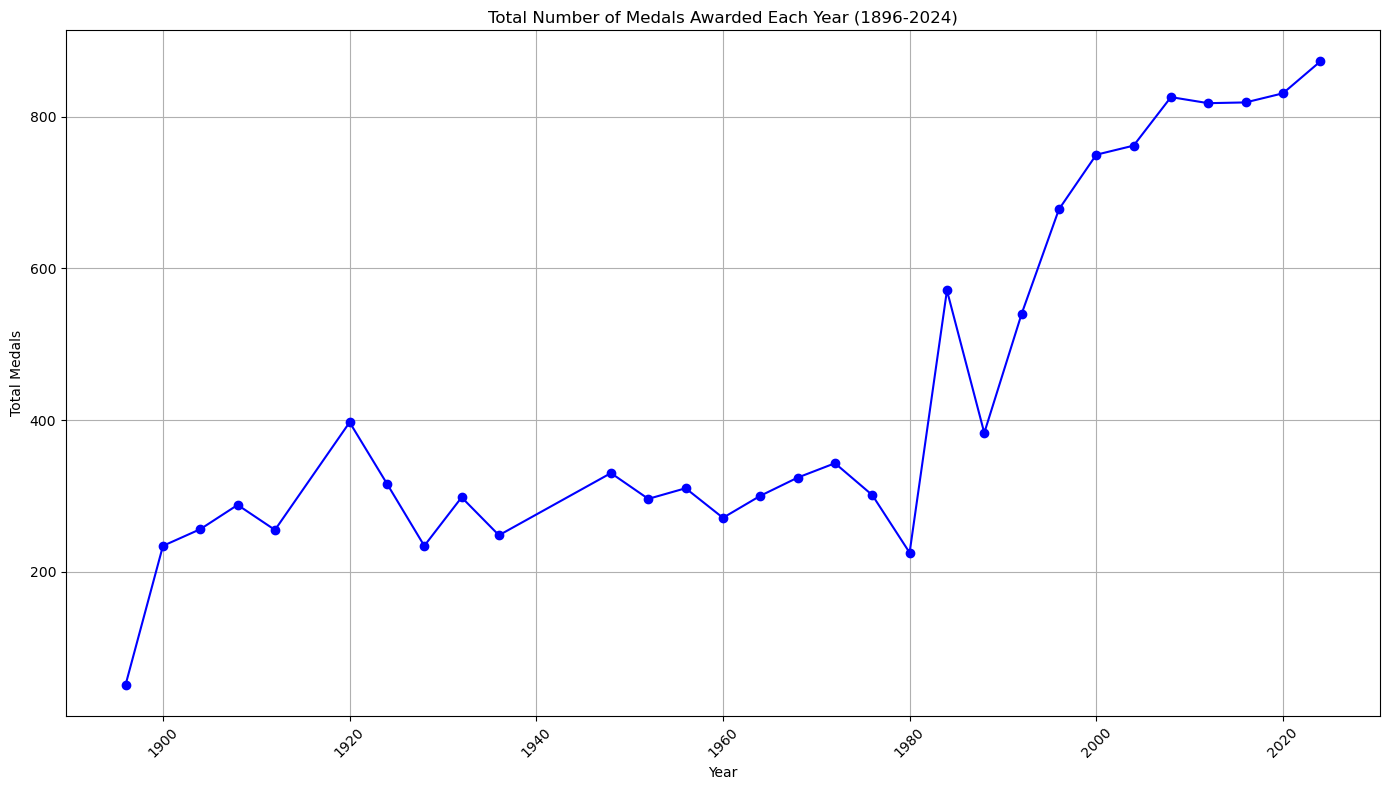

In [38]:
# Group by 'Year' and sum the total number of medals (though 'Total_Medals' should already be summed)
medals_by_year = df.groupby('Year')['Total_Medals'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(medals_by_year['Year'], medals_by_year['Total_Medals'], marker='o', linestyle='-', color='b')
plt.title('Total Number of Medals Awarded Each Year (1896-2024)')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## *Total Medals Won by the US Over the Years*

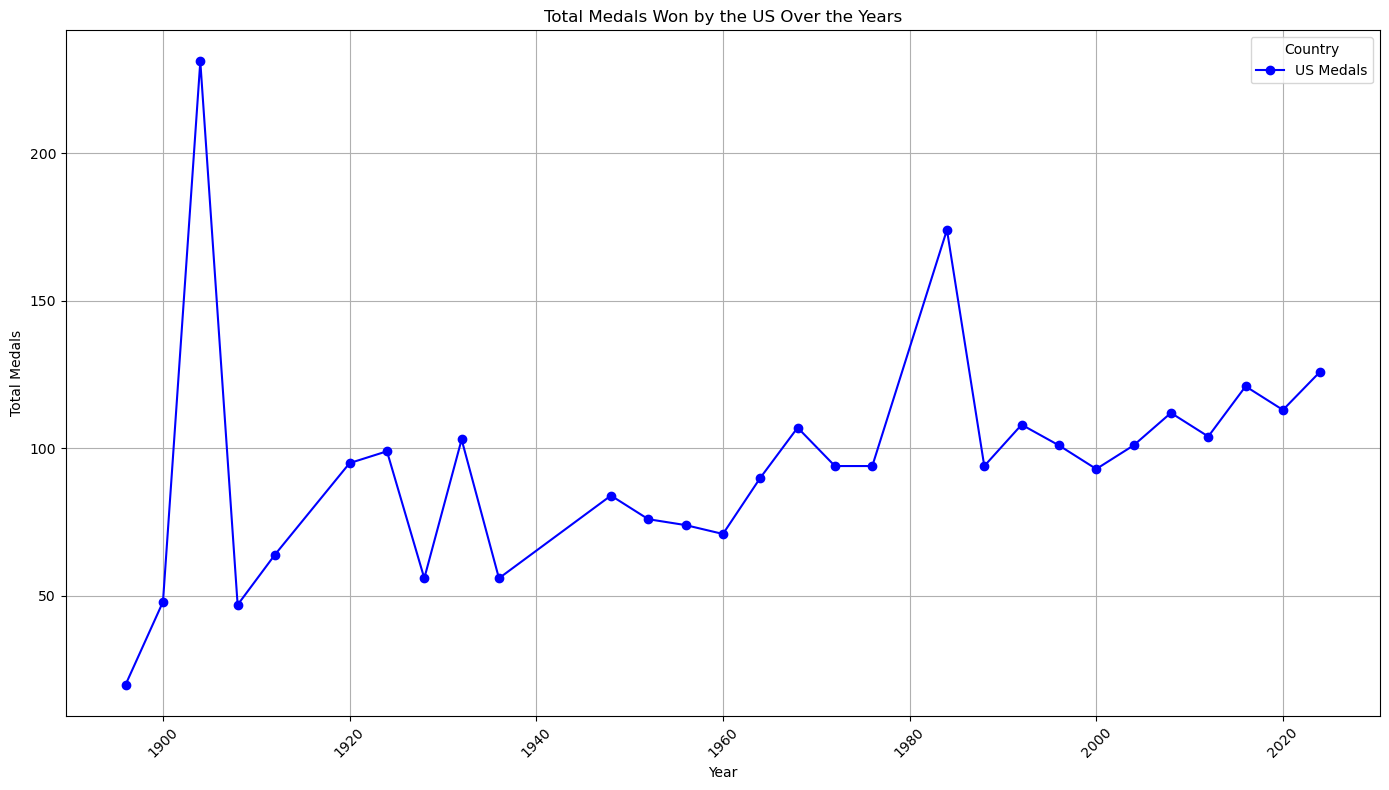

In [39]:
# Ensure 'Year' and 'Total_Medals' columns are correctly formatted
df['Year'] = df['Year'].astype(int)
df['Total_Medals'] = df['Total_Medals'].astype(int)

# Filter data for the US
us_data = df[df['Country_Name'] == 'United States']

# Aggregate total number of medals by year
us_medals_per_year = us_data.groupby('Year')['Total_Medals'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(us_medals_per_year['Year'], us_medals_per_year['Total_Medals'], marker='o', color='blue', label='US Medals')

plt.title('Total Medals Won by the US Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [40]:
# Ensure 'Year' and 'Total_Medals' columns are correctly formatted
df['Year'] = df['Year'].astype(int)
df['Total_Medals'] = df['Total_Medals'].astype(int)

# Filter data for the US
us_data = df[df['Country_Name'] == 'United States']

# Aggregate total number of medals by year
us_medals_per_year = us_data.groupby('Year')['Total_Medals'].sum().reset_index()

# Print the results
print("Total Medals Won by the US Each Year:")
print(us_medals_per_year.to_string(index=False))

Total Medals Won by the US Each Year:
 Year  Total_Medals
 1896            20
 1900            48
 1904           231
 1908            47
 1912            64
 1920            95
 1924            99
 1928            56
 1932           103
 1936            56
 1948            84
 1952            76
 1956            74
 1960            71
 1964            90
 1968           107
 1972            94
 1976            94
 1984           174
 1988            94
 1992           108
 1996           101
 2000            93
 2004           101
 2008           112
 2012           104
 2016           121
 2020           113
 2024           126


# *Medals Distribution by Country*

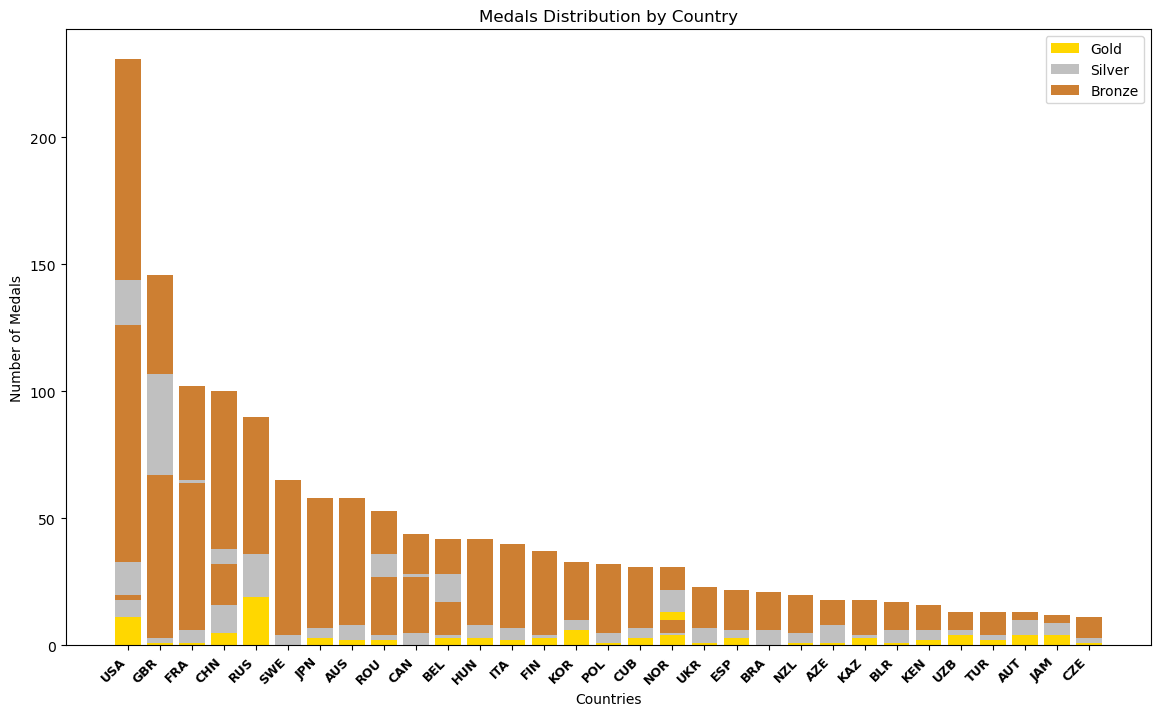

In [41]:
# Assuming 'mdf' includes 'gold medals', 'silver medals', and 'bronze medals' columns
df = df[df['Total_Medals'] >= 10].sort_values(by='Total_Medals', ascending=False)

# Define colors for each type of medal
colors = {
    'Gold': '#FFD700',   # Gold color
    'Silver': '#C0C0C0', # Silver color
    'Bronze': '#cd7f32'  # Bronze color
}

plt.figure(figsize=(14, 8))

# Plotting stacked bar plot
plt.bar(df['Country_Code'], df['Gold'], color=colors['Gold'], label='Gold')
plt.bar(df['Country_Code'], df['Silver'], bottom=df['Gold'], color=colors['Silver'], label='Silver')
plt.bar(df['Country_Code'], df['Bronze'], bottom=df['Gold'] + df['Silver'], color=colors['Bronze'], label='Bronze')

# Set plot labels and title
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, fontsize=9, fontweight='heavy', ha='right')
plt.title('Medals Distribution by Country')
plt.legend()

# Show the plot
plt.show()

## *Most Common Medal won By USA Yearly*

In [42]:
# Filter the DataFrame for 'United States'
us_medals = df[df['Country_Name'] == 'United States']

# Print the 'Most_Common_Medal' column
print(us_medals[['Year', 'Most_Common_Medal']])

     Year Most_Common_Medal
414  1904            Silver
470  1984              Gold
527  2024            Silver
514  2016              Gold
521  2020            Silver
501  2008            Silver
480  1992              Gold
453  1968              Gold
510  2012              Gold
427  1932              Gold
495  2004            Silver
487  1996              Gold
422  1924              Gold
421  1920              Gold
476  1988              Gold
463  1976            Silver
457  1972              Gold
491  2000              Gold
451  1964              Gold
434  1948              Gold
438  1952              Gold
444  1956              Gold
445  1960              Gold
418  1912              Gold
429  1936              Gold
425  1928              Gold
410  1900              Gold
417  1908              Gold
409  1896              Gold


In [43]:
# Filter the DataFrame for 'United States'
us_medals = df[df['Country_Name'] == 'United States']

# Determine the most common medal for each year and its count
us_medals['Most_Common_Medal_Amount'] = us_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
us_medals_summary = us_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(us_medals_summary)

     Year Most_Common_Medal  Most_Common_Medal_Amount
414  1904            Silver                        78
470  1984              Gold                        83
527  2024            Silver                        44
514  2016              Gold                        46
521  2020            Silver                        41
501  2008            Silver                        39
480  1992              Gold                        37
453  1968              Gold                        45
510  2012              Gold                        46
427  1932              Gold                        41
495  2004            Silver                        39
487  1996              Gold                        44
422  1924              Gold                        45
421  1920              Gold                        41
476  1988              Gold                        36
463  1976            Silver                        35
457  1972              Gold                        33
491  2000              Gold 

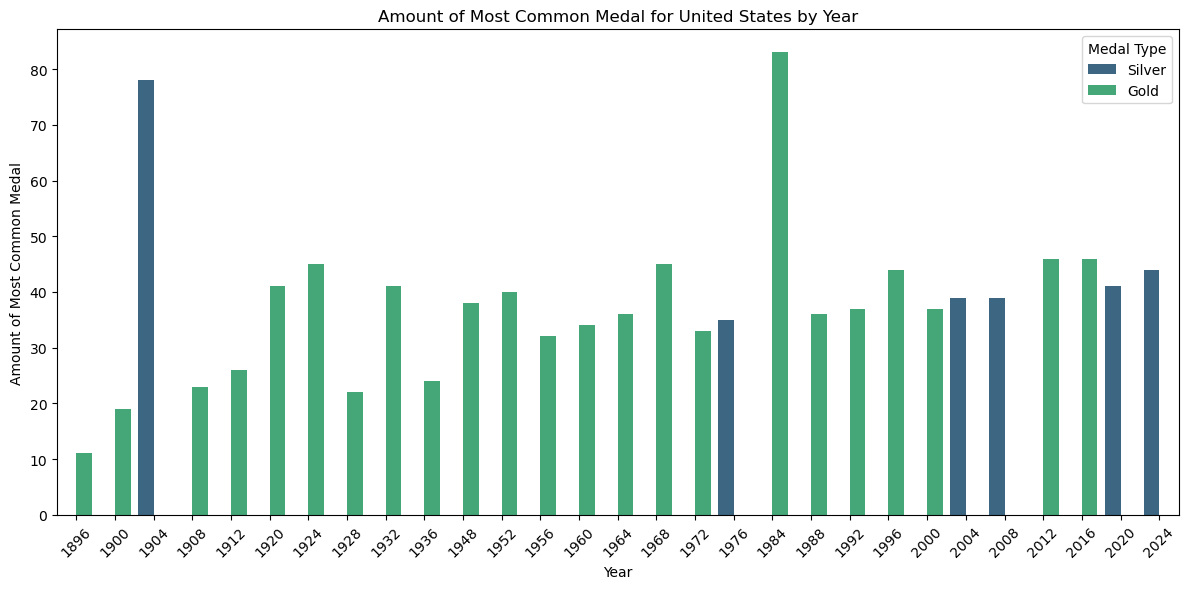

In [44]:
# Plot the data
plt.figure(figsize=(12, 6))

# Plot the bar plot
sns.barplot(data=us_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for United States by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## *Medals Distribution by Continent*

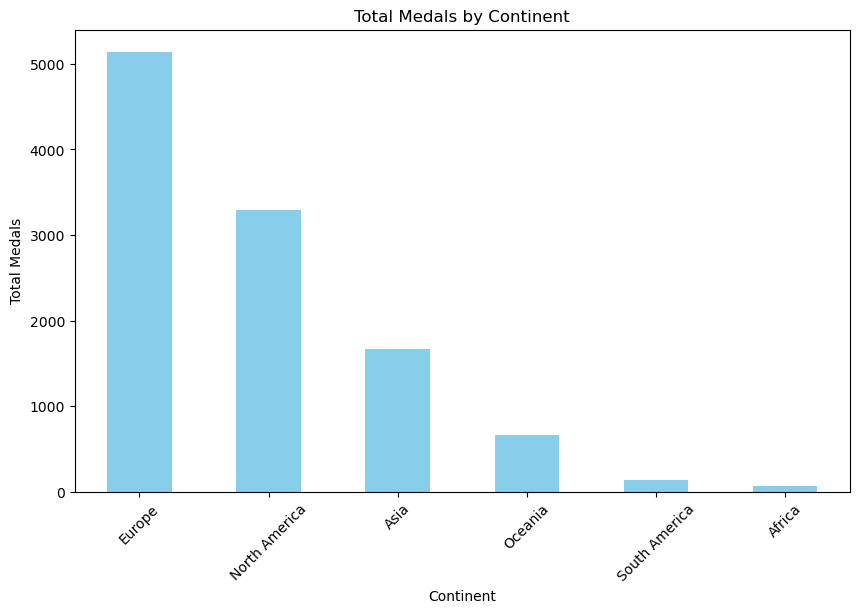

In [45]:
continent_medal_counts = df.groupby('continent')['Total_Medals'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
continent_medal_counts.plot(kind='bar', color='skyblue')
plt.title('Total Medals by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

## *Most common Medal won By Each Continent Every Year*

### *Europe*

In [46]:
# Filter the DataFrame for Europe
europe_medals = df[df['continent'] == 'Europe']

# Determine the amount of the most common medal for each year
europe_medals['Most_Common_Medal_Amount'] = europe_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
europe_medals_summary = europe_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(europe_medals_summary)

     Year Most_Common_Medal  Most_Common_Medal_Amount
22   1908              Gold                        56
6    1900            Silver                        38
292  2004            Bronze                        36
270  2000              Gold                        32
337  2012            Bronze                        28
..    ...               ...                       ...
284  2004            Bronze                         5
262  2000              Gold                         4
47   1924              Gold                         5
365  2016            Bronze                         7
29   1912            Bronze                         5

[183 rows x 3 columns]


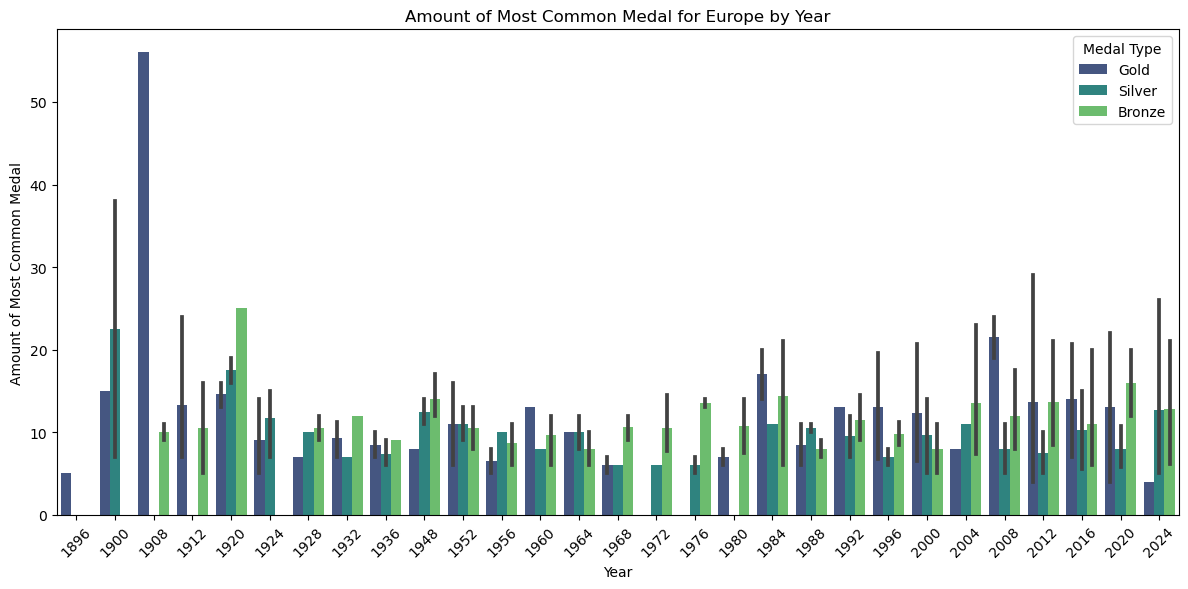

In [47]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=europe_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Europe by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *North America*

In [48]:
# Filter the DataFrame for North America
na_medals = df[df['continent'] == 'North America']

# Determine the amount of the most common medal for each year
na_medals['Most_Common_Medal_Amount'] = na_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
na_medals_summary = na_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(na_medals_summary)

     Year Most_Common_Medal  Most_Common_Medal_Amount
414  1904            Silver                        78
470  1984              Gold                        83
527  2024            Silver                        44
514  2016              Gold                        46
521  2020            Silver                        41
501  2008            Silver                        39
480  1992              Gold                        37
453  1968              Gold                        45
510  2012              Gold                        46
427  1932              Gold                        41
495  2004            Silver                        39
487  1996              Gold                        44
422  1924              Gold                        45
421  1920              Gold                        41
476  1988              Gold                        36
463  1976            Silver                        35
457  1972              Gold                        33
491  2000              Gold 

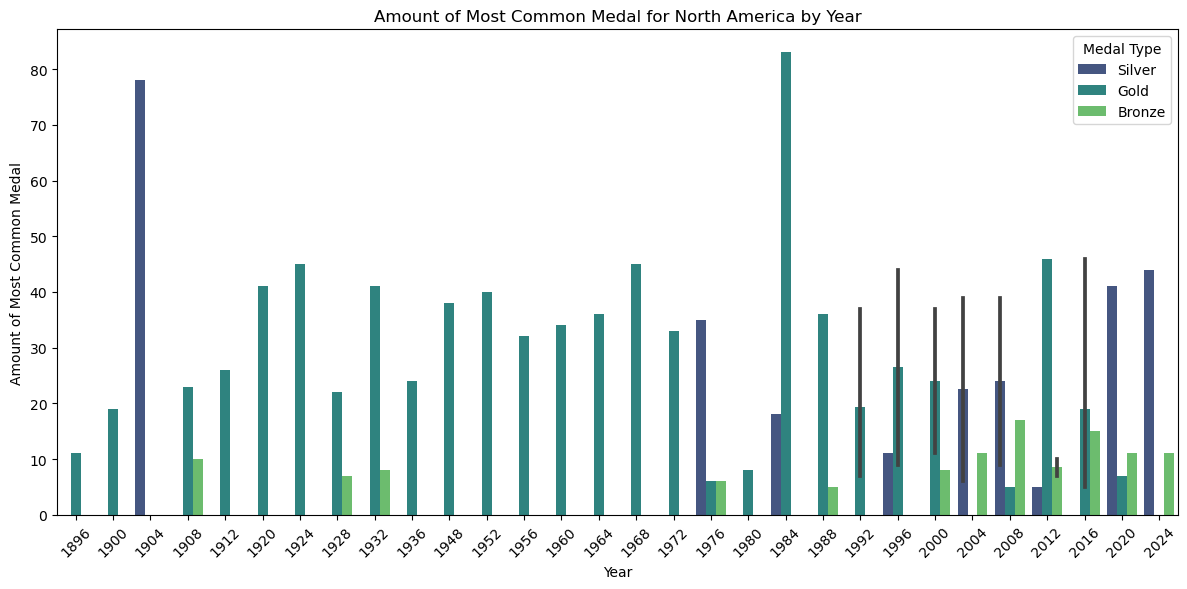

In [49]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=na_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for North America by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Asia*

In [50]:
# Filter the DataFrame for Asia
asia_medals = df[df['continent'] == 'Asia']

# Determine the amount of the most common medal for each year
asia_medals['Most_Common_Medal_Amount'] = asia_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
asia_medals_summary = asia_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(asia_medals_summary)

     Year Most_Common_Medal  Most_Common_Medal_Amount
711  2008              Gold                        48
774  2024              Gold                        40
722  2012              Gold                        38
760  2020              Gold                        38
747  2016              Gold                        26
693  2004              Gold                        32
761  2020              Gold                        27
677  2000              Gold                        28
653  1992            Silver                        22
663  1996            Silver                        22
775  2024              Gold                        20
745  2016            Bronze                        21
724  2012            Bronze                        17
692  2004              Gold                        16
645  1988              Gold                        12
709  2008              Gold                        13
776  2024              Gold                        13
637  1984            Bronze 

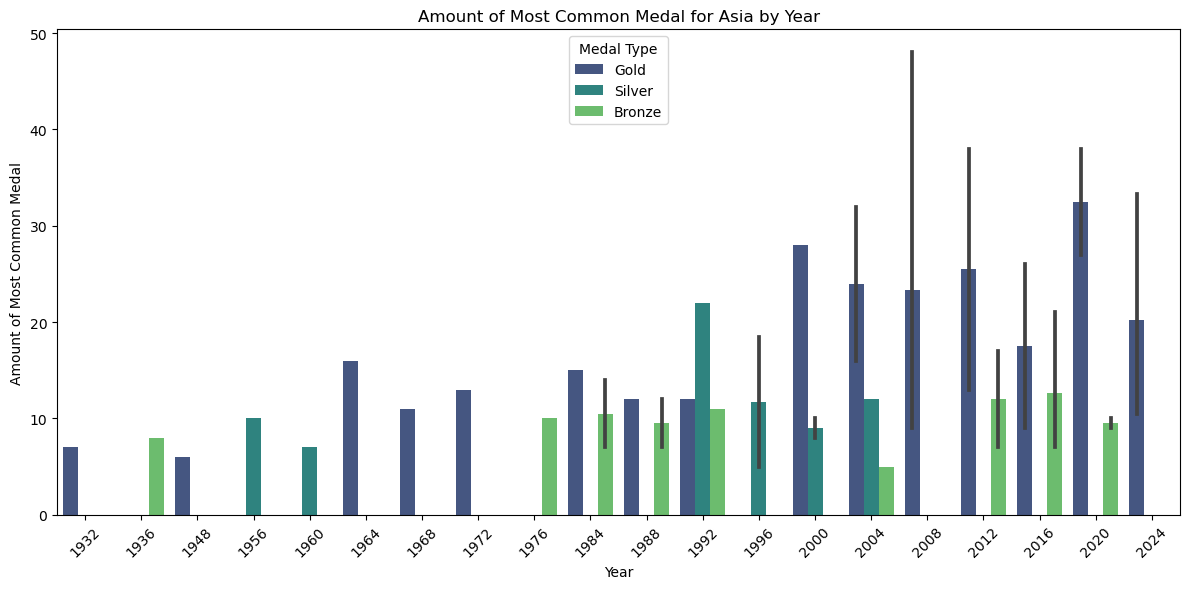

In [51]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=asia_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Asia by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Oceania*

In [52]:
# Filter the DataFrame for Oceania
oceania_medals = df[df['continent'] == 'Oceania']

# Determine the amount of the most common medal for each year
oceania_medals['Most_Common_Medal_Amount'] = oceania_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
oceania_medals_summary = oceania_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(oceania_medals_summary)

     Year Most_Common_Medal  Most_Common_Medal_Amount
573  2000            Silver                        25
585  2024            Silver                        19
576  2004              Gold                        17
578  2008            Bronze                        17
583  2020            Bronze                        22
572  1996            Bronze                        23
579  2012            Silver                        15
553  1956            Bronze                        14
581  2016            Silver                        11
570  1992            Bronze                        11
566  1984            Bronze                        12
555  1960              Gold                         8
584  2020              Gold                         7
586  2024              Gold                        10
557  1964            Bronze                        10
582  2016            Silver                         9
560  1972              Gold                         8
558  1968            Silver 

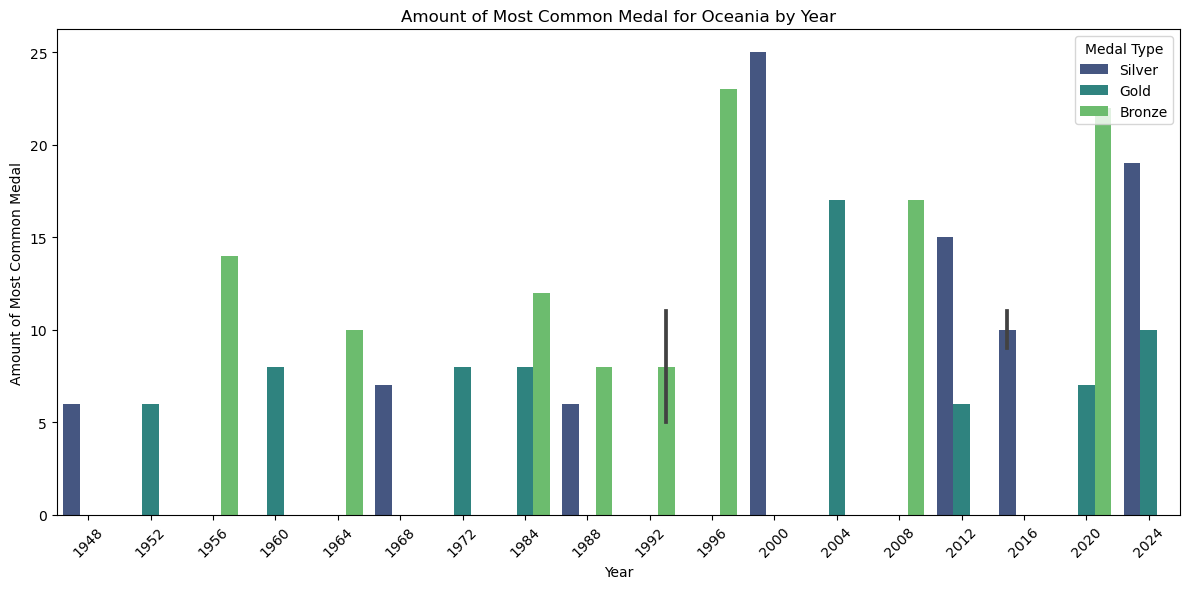

In [53]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=oceania_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Oceania by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *South America*

In [54]:
# Filter the DataFrame for South America
sa_medals = df[df['continent'] == 'South America']

# Determine the amount of the most common medal for each year
sa_medals['Most_Common_Medal_Amount'] = sa_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
sa_medals_summary = sa_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(sa_medals_summary)

     Year Most_Common_Medal  Most_Common_Medal_Amount
863  2020            Bronze                         8
867  2024            Bronze                        10
860  2016              Gold                         7
849  2008            Bronze                        10
856  2012            Bronze                         9
839  1996            Bronze                         9
844  2000            Silver                         6
845  2004              Gold                         5


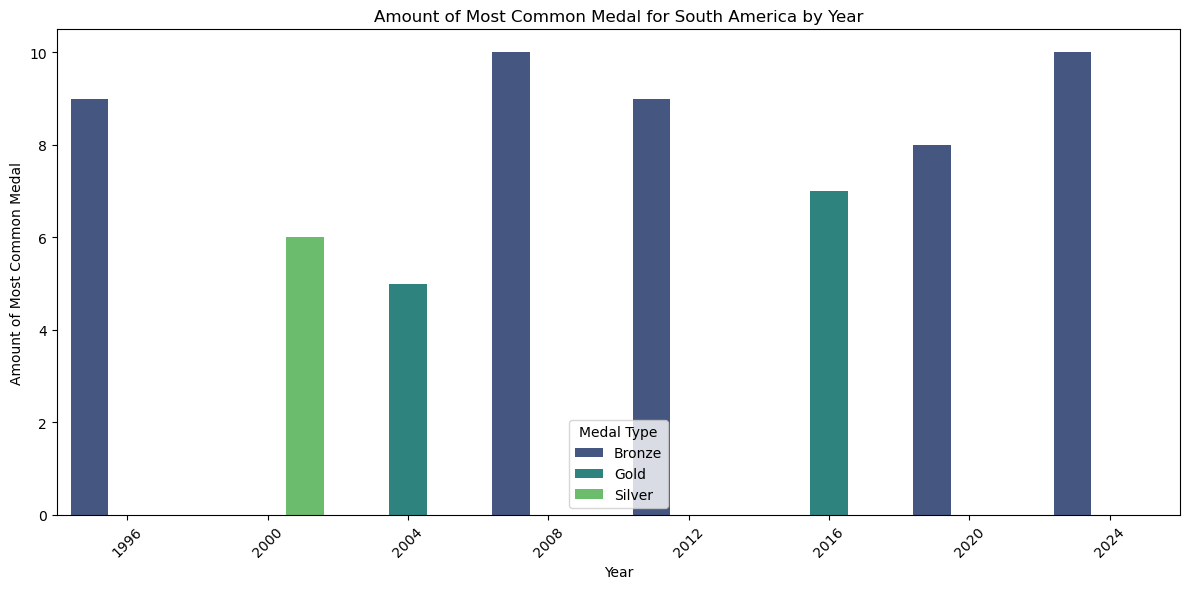

In [55]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=sa_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for South America by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Africa*

In [56]:
# Filter the DataFrame for Africa
africa_medals = df[df['continent'] == 'Africa']

# Determine the amount of the most common medal for each year
africa_medals['Most_Common_Medal_Amount'] = africa_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
africa_medals_summary = africa_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(africa_medals_summary)

     Year Most_Common_Medal  Most_Common_Medal_Amount
930  2008              Gold                         6
935  2012            Bronze                         7
943  2016              Gold                         6
959  2024            Bronze                         5
951  2020              Gold                         4


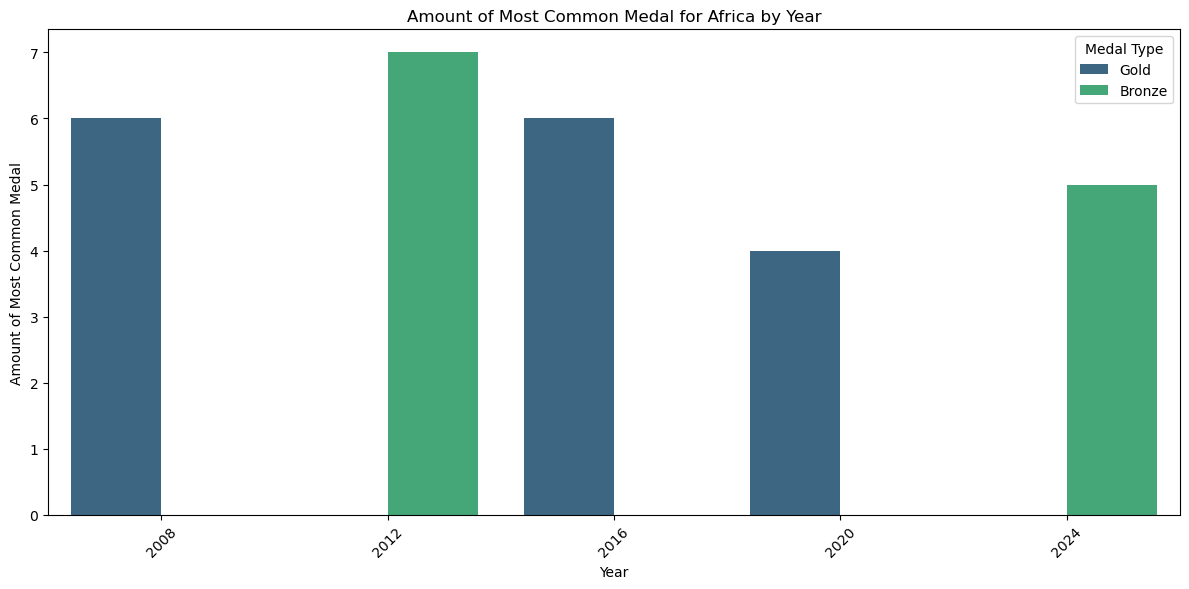

In [57]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=africa_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Africa by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## *Medal Efficiency by Country*

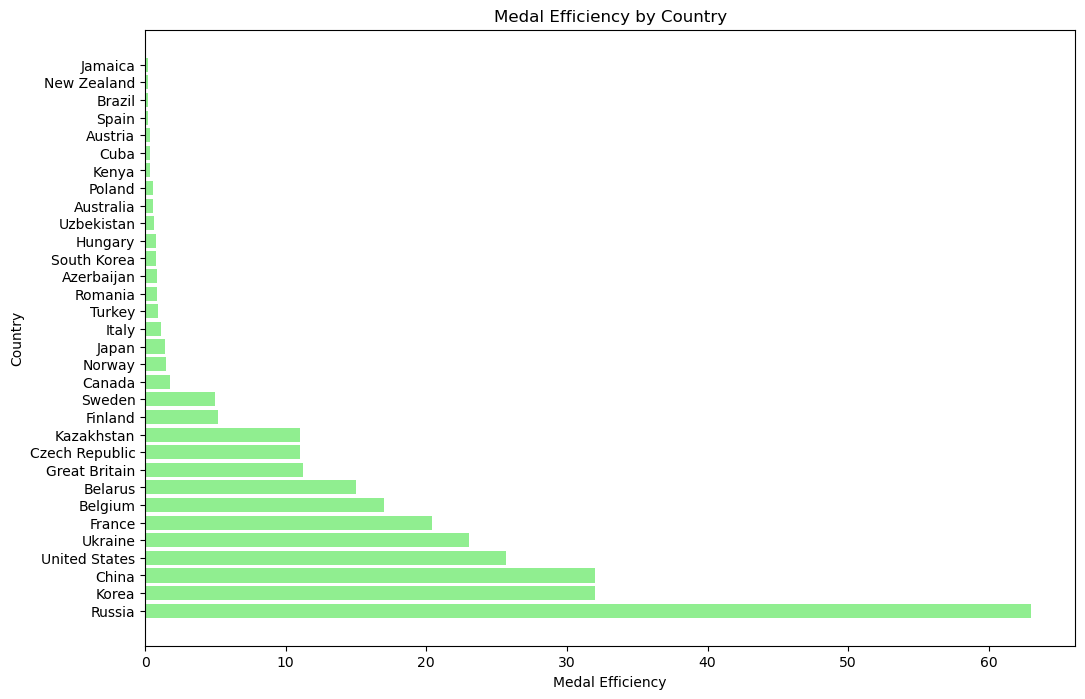

In [58]:
plt.figure(figsize=(12, 8))
df_sorted_by_efficiency = df.sort_values(by='Medal_Efficiency', ascending=False)
plt.barh(df_sorted_by_efficiency['Country_Name'], df_sorted_by_efficiency['Medal_Efficiency'], color='lightgreen')
plt.title('Medal Efficiency by Country')
plt.xlabel('Medal Efficiency')
plt.ylabel('Country')
plt.show()

## *Trend of Total Medals Over Time(Countries with at least 10 every year)*

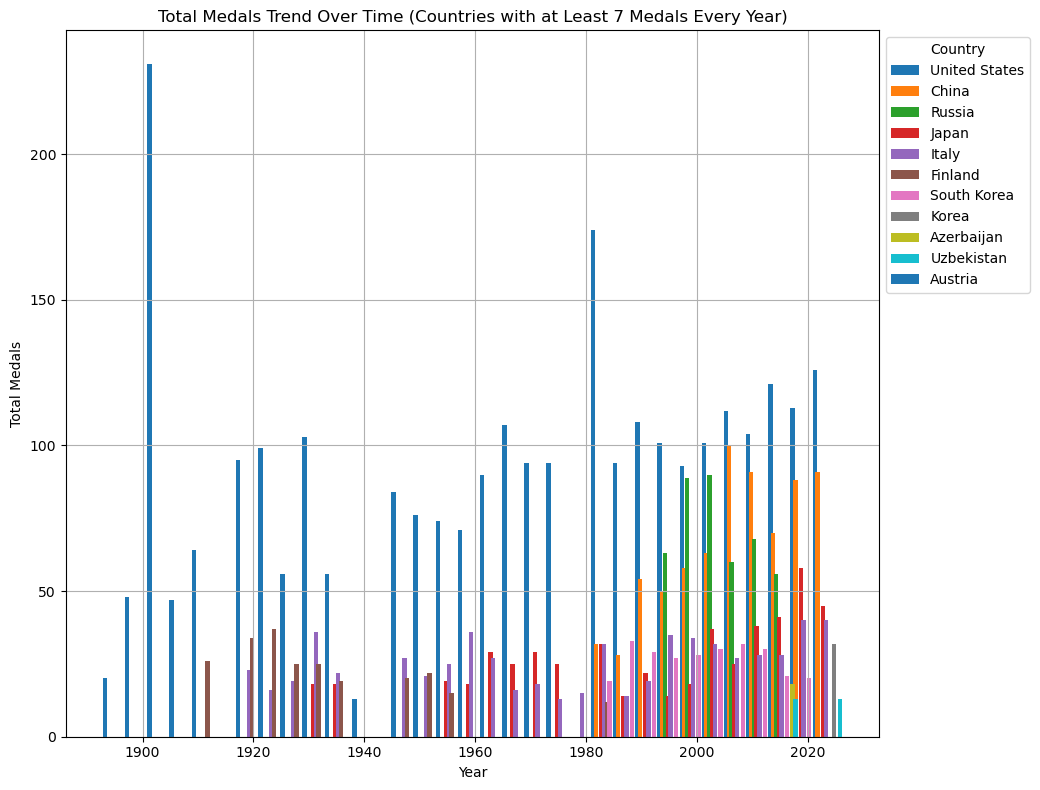

In [59]:
# Filter out countries with at least 3 total medals every year
countries_with_min_medals = df.groupby('Country_Name').filter(lambda x: (x['Total_Medals'] >= 12).all())

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot each country's data as a bar chart
for country in countries_with_min_medals['Country_Name'].unique():
    country_df = countries_with_min_medals[countries_with_min_medals['Country_Name'] == country]
    plt.bar(country_df['Year'] + 0.5 * (list(countries_with_min_medals['Country_Name'].unique()).index(country) - len(countries_with_min_medals['Country_Name'].unique())/2), 
            country_df['Total_Medals'], 
            width=0.8,  # Increase the width of the bars
            label=country)

# Add titles and labels
plt.title('Total Medals Trend Over Time (Countries with at Least 7 Medals Every Year)')
plt.xlabel('Year')
plt.ylabel('Total Medals')

# Add legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')

# Add grid
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the right side to fit the legend

# Show the plot
plt.show()

## *Host Advantage Impact*

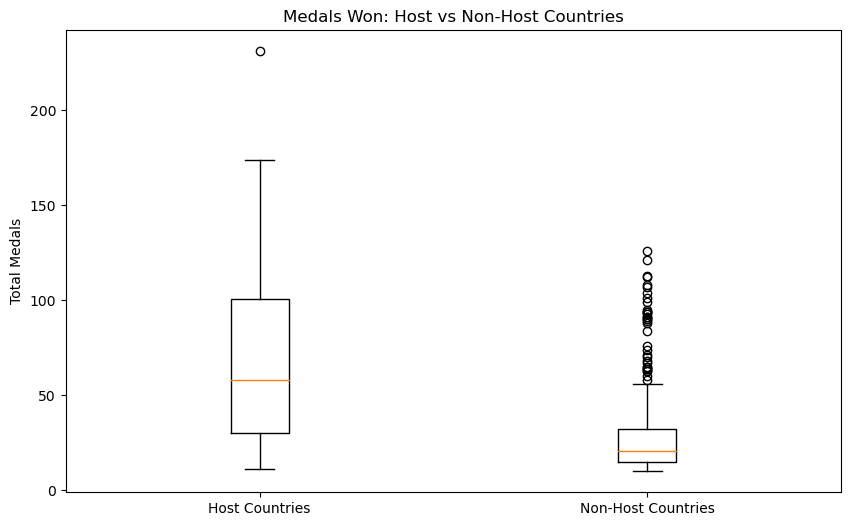

In [60]:
plt.figure(figsize=(10, 6))
df['Is_Host'] = df['Host_country'] == df['Country_Name']
plt.boxplot([df[df['Is_Host']]['Total_Medals'], df[~df['Is_Host']]['Total_Medals']],
            labels=['Host Countries', 'Non-Host Countries'])
plt.title('Medals Won: Host vs Non-Host Countries')
plt.ylabel('Total Medals')
plt.show()

## *Medal Trend Percentage by Country*

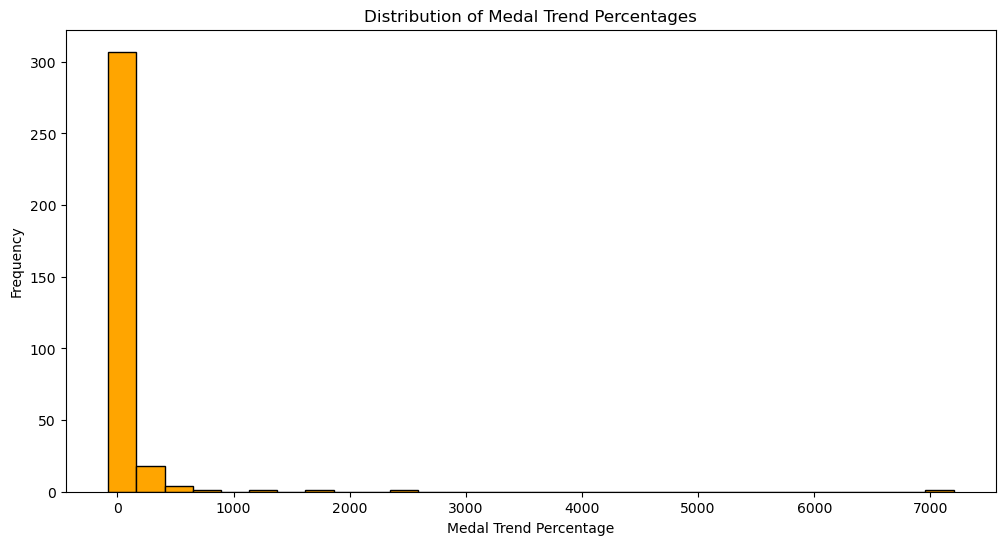

In [61]:
plt.figure(figsize=(12, 6))
plt.hist(df['Medal_Trend'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Medal Trend Percentages')
plt.xlabel('Medal Trend Percentage')
plt.ylabel('Frequency')
plt.show()

# *Hypothesis Testing*

## *Host Advantage Hypothesis*

- **Null Hypothesis (H0):** There is no difference in the average number of medals won by host countries compared to non-hosting years.
- **Alternative Hypothesis (H1):** Host countries win significantly more medals compared to non-hosting years.

In [62]:
# Separate data into host and non-host years
host_medals = df[df['Is_Host']]['Total_Medals']
non_host_medals = df[~df['Is_Host']]['Total_Medals']

# Perform t-test
t_stat, p_value = stats.ttest_ind(host_medals, non_host_medals)
print(f"Host Advantage Effect Test:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Print result interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Host countries win significantly more medals.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medals won by host countries.")

Host Advantage Effect Test:
T-statistic: 7.05, P-value: 0.0000
Reject the null hypothesis: Host countries win significantly more medals.


## *Medal Type and Country Performance*

- **Null Hypothesis (H0):** There is no difference in medal efficiency across different continents.
- **Alternative Hypothesis (H1):** Medal efficiency differs significantly between continents.

In [63]:
# Perform ANOVA
anova_result = stats.f_oneway(*[df[df['continent'] == continent]['Medal_Efficiency'] for continent in df['continent'].unique()])
print(f"Medal Efficiency Across Continents Test:\nF-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}")

# Print result interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: Medal efficiency differs significantly between continents.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medal efficiency between continents.")

Medal Efficiency Across Continents Test:
F-statistic: 0.91, P-value: 0.4731
Fail to reject the null hypothesis: No significant difference in medal efficiency between continents.


## *Effect of Medal Type on Medal Efficiency*

- **Null Hypothesis (H0):** There is no difference in medal efficiency among different medal types (Gold, Silver, Bronze).
- **Alternative Hypothesis (H1):** Medal efficiency differs significantly among different medal types.

In [64]:
# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Most_Common_Medal'] == 'Gold']['Medal_Efficiency'],
    df[df['Most_Common_Medal'] == 'Silver']['Medal_Efficiency'],
    df[df['Most_Common_Medal'] == 'Bronze']['Medal_Efficiency']
)
print(f"Effect of Medal Type on Medal Efficiency Test:\nF-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}")

# Print result interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: Medal efficiency differs significantly among different medal types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medal efficiency among medal types.")

Effect of Medal Type on Medal Efficiency Test:
F-statistic: 2.86, P-value: 0.0586
Fail to reject the null hypothesis: No significant difference in medal efficiency among medal types.


## *Impact of Host City on Medal Counts*

- **Null Hypothesis (H0):** There is no difference in the number of medals won by countries based on whether they are the host city.
- **Alternative Hypothesis (H1):** Countries win significantly different numbers of medals based on whether they are the host city.

In [65]:
# Separate data into host and non-host cities
host_city_medals = df[df['Host_city'] == df['Country_Name']]['Total_Medals']
non_host_city_medals = df[df['Host_city'] != df['Country_Name']]['Total_Medals']

# Perform t-test
t_stat, p_value = stats.ttest_ind(host_city_medals, non_host_city_medals)
print(f"Impact of Host City on Medal Counts Test:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Print result interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in medals won by host cities vs. non-host cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medals won by host cities vs. non-host cities.")

Impact of Host City on Medal Counts Test:
T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: No significant difference in medals won by host cities vs. non-host cities.
